# Analyzing Mobile App Store Data

Identifying Profitable App Profiles Using Google Play & Apple App Store Data

##  Project Overview

The mobile application ecosystem has expanded rapidly, creating a highly
competitive marketplace with millions of applications available across
multiple platforms. Developers and businesses face increasing challenges
in identifying app ideas that are both popular among users and financially
profitable.

This project focuses on analyzing datasets from the **Google Play Store**
and **Apple App Store** to uncover patterns related to app categories,
pricing strategies, user engagement, and ratings. The analysis applies
data cleaning, exploratory data analysis (EDA), and visualization techniques
using Python to generate actionable business insights.

The final objective is to identify **profitable app profiles** that can
guide future mobile app development decisions.


## Problem Statement

With thousands of mobile applications being launched every day, it has become
difficult for developers to understand what factors contribute to an app’s
success. Poor market analysis can result in low downloads, weak user
engagement, and financial losses.

This project aims to answer the following key questions:

- Which app categories are most popular among users?
- Do free apps perform better than paid apps?
- How does pricing affect user ratings and downloads?
- Which app categories provide the best opportunities for new developers?

By addressing these questions, the project transforms raw app store data
into meaningful insights that support data-driven decision-making.


## Project Objective
The goal of this project is to analyze mobile application data from the
**Google Play Store** and **Apple App Store** to identify **profitable app profiles**.

Profitability is analyzed using indicators such as:
- App category / genre
- User ratings
- Number of reviews
- Number of installs (Google Play)
- Pricing strategy (Free vs Paid)

This project demonstrates real-world data handling, exploratory data analysis (EDA),
visualization, and business insight generation using Python.

## Profitable App Profile

A profitable app profile is not determined solely by revenue, but by a combination
of **market demand**, **user engagement**, and **sustainable monetization strategy**.
In this analysis, profitability is inferred using measurable indicators available
within app store data.

Key characteristics of a profitable app include:
- **High user engagement**, reflected through a large number of installs and reviews
- **Strong user satisfaction**, indicated by consistently high ratings
- **Clear market demand**, shown by category or genre popularity
- **Effective monetization**, either through scalable free models (ads, in-app purchases)
  or premium paid pricing

Apps that balance user value with monetization efficiency tend to achieve
long-term success rather than short-term spikes in downloads.

## Tech Stack

- **Language:** Python  
- **Data Analysis:** Pandas, NumPy  
- **Visualization:** Matplotlib, Seaborn  
- **Environment:** Jupyter Notebook  
- **Datasets:** Google Play Store & Apple App Store (CSV)

## Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pd.set_option("display.max_columns", None)

## Load Datasets

In [5]:
google_df = pd.read_csv("C:/Users/LOQ/Downloads/Apps/googleplaystore.csv")
apple_df = pd.read_csv("C:/Users/LOQ/Downloads/Apps/AppleStore.csv")

## Dataset Overview

Before analysis, it is important to understand the structure of the datasets.
This includes examining the number of rows, columns, data types, and potential
data quality issues.

### Preview Data

In [6]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


The Google Play Store dataset contains metadata for Android applications.
Each row represents a unique application along with details related to
user engagement and pricing.

### Key Features:
- **App**: Application name  
- **Category**: App category  
- **Rating**: Average user rating  
- **Reviews**: Number of user reviews  
- **Installs**: Total number of downloads  
- **Type**: Free or Paid  
- **Price**: App price  
- **Content Rating**: Target age group  
- **Genres**: Application genre  

This dataset helps analyze popularity, competition, and pricing trends
within the Android ecosystem.

In [7]:
apple_df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1



The Apple App Store dataset provides detailed information about iOS
applications and their performance metrics.

### Key Features:
- **track_name**: App name  
- **prime_genre**: Primary app category  
- **price**: App price  
- **user_rating**: Average user rating  
- **rating_count_tot**: Total number of ratings  
- **size_bytes**: Application size  

This dataset enables comparison between iOS and Android platforms and
helps identify market differences.

### Dataset Information

In [8]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


### Initial Observations

**Google Play Store Dataset**
- Contains missing values
- Some numeric columns are stored as text
- Requires extensive data cleaning

**Apple App Store Dataset**
- Relatively clean
- Numeric columns already well-formatted
- Minimal preprocessing required


## Data Cleaning Strategy

Data cleaning is performed **separately** for each dataset.

### Google Play Store:
- Remove corrupted rows
- Convert numeric columns to proper types
- Clean install and price values
- Handle missing ratings

### Apple App Store:
- Remove unnecessary columns
- Validate data types

## Google Play Store Data Cleaning

#### Handling Missing Values

User ratings are an important metric for profitability analysis. Missing ratings can bias
results if not handled properly. Since ratings are numerical and approximately normally
distributed, the median value is used for imputation.

In [11]:
google_df['Rating']= google_df['Rating'].fillna(google_df['Rating'].median())

####  Handling Corrupted Record

A single corrupted row was detected where the value "Everyone" appeared in the Price column.
This issue occurred due to column shifting during data collection.

As this record violates the dataset schema and represents a negligible portion of the data,
it is removed to ensure analytical integrity.

In [12]:
google_df = google_df[google_df['Price'].str.contains('Everyone', na=False) == False]

#### Cleaning Price Column
The Price column contains currency symbols that prevent numerical operations.
These symbols are removed and the column is converted to a numeric format.

In [15]:
google_df.loc[:,'Price'] = google_df['Price'].astype(str).str.replace('$', '', regex=False).astype(float)

#### Cleaning Installs Column

Install counts are critical for estimating market reach. Formatting characters such as
commas and plus signs are removed to enable quantitative analysis.


In [16]:
google_df['Installs'] = (
    google_df['Installs']
    .str.replace(',', '', regex=False)
    .str.replace('+', '', regex=False)
    .astype(float)
)

#### Cleaning Reviews Column

In [17]:
google_df['Reviews'] = google_df['Reviews'].astype(int)

## Apple App Store Data Cleaning

The Apple App Store dataset requires minimal preprocessing. An unnecessary index column
is removed, while all other columns are already in suitable formats for analysis.

apple_df.drop(columns=['Unnamed: 0'], inplace=True)

## Data Validation

After cleaning, data validation ensures that all columns have appropriate data types.
Numeric fields are confirmed to support statistical operations, while categorical fields
remain unchanged for grouping and segmentation.

In [18]:
google_df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [19]:
apple_df.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

## Exploratory Data Analysis (EDA)

EDA helps uncover patterns, trends, and relationships in data.
This section focuses on understanding user behavior and market trends.

##  App Category Distribution (Google Play Store)

Understanding how applications are distributed across categories is a fundamental
step in exploratory data analysis. In this analysis, applications are grouped by
their category, and the total number of apps in each category is calculated.
This helps identify which categories dominate the Google Play Store ecosystem.

By analyzing category distribution, we gain insight into developer focus areas,
market saturation, and potential competition levels. Categories with a large
number of applications often indicate high demand but also intense competition,
while categories with fewer apps may represent niche opportunities with lower
market saturation.


In [30]:
category_counts = google_df['Category'].value_counts()
category_counts.head(10)

Category
FAMILY             1972
GAME               1144
TOOLS               843
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     392
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: count, dtype: int64

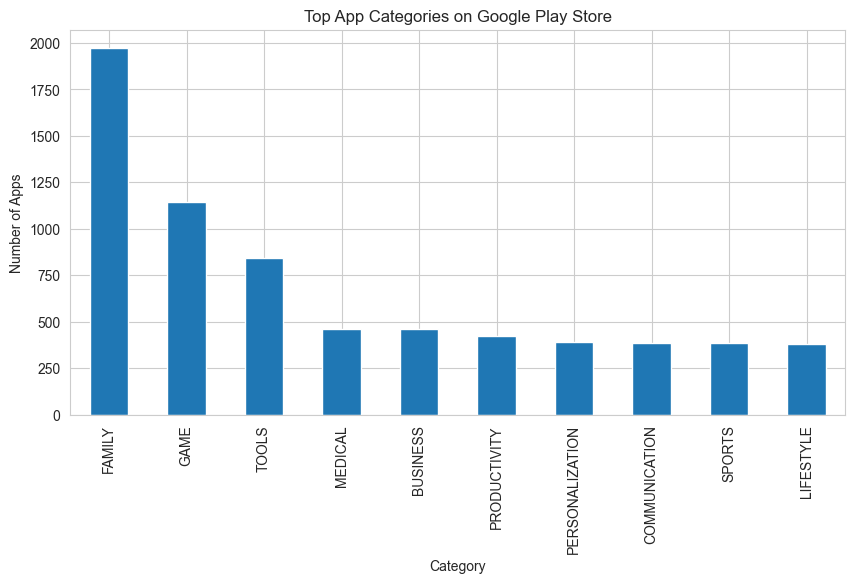

In [21]:
plt.figure(figsize=(10,5))
category_counts.head(10).plot(kind='bar')
plt.title("Top App Categories on Google Play Store")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()

### Business Insight

The visualization shows that the **Family** category contains the highest number
of applications, followed by **Game** and **Tools** categories. This indicates
that family-oriented and entertainment-based applications are heavily produced
on the Google Play Store.

While these categories attract a large user base, the high number of apps also
suggests intense competition. Developers entering these markets must focus on
innovation, superior user experience, or niche subcategories to stand out.

## Average Rating by Category (Google Play Store)


To evaluate user satisfaction across different app categories, the average user
rating is calculated for each category. This category-wise aggregation allows
us to compare how users perceive apps based on their functional domain rather
than individual app performance.

Analyzing average ratings by category helps identify areas where apps tend to
perform better in terms of user experience, reliability, and overall satisfaction.
High average ratings may indicate well-defined use cases, lower user expectations,
or higher content quality within those categories.


In [22]:
avg_rating_category = (
    google_df.groupby('Category')['Rating']
    .mean()
    .sort_values(ascending=False)
)
avg_rating_category.head(10)


Category
EVENTS                 4.395313
EDUCATION              4.388462
ART_AND_DESIGN         4.355385
BOOKS_AND_REFERENCE    4.335498
PERSONALIZATION        4.328827
PARENTING              4.300000
GAME                   4.286888
BEAUTY                 4.283019
HEALTH_AND_FITNESS     4.280059
SHOPPING               4.263077
Name: Rating, dtype: float64

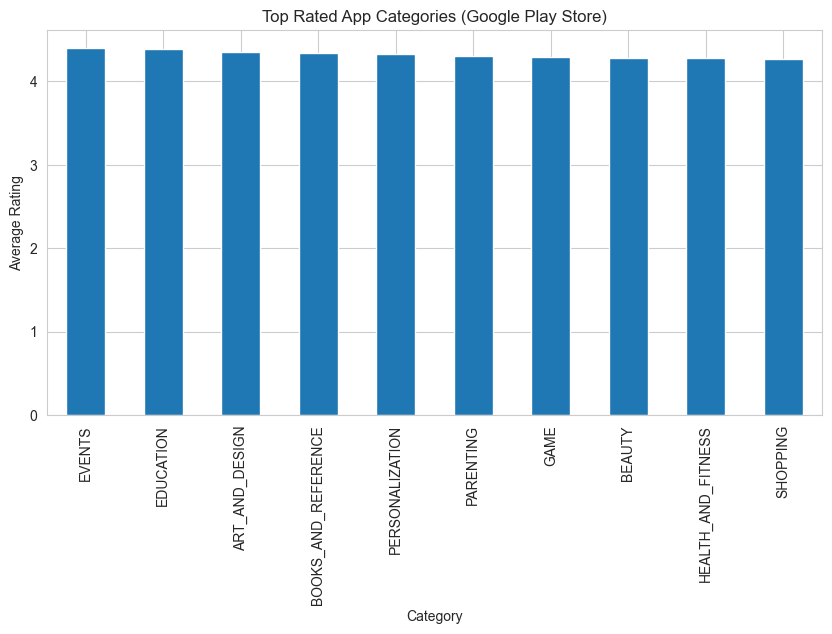

In [23]:
plt.figure(figsize=(10,5))
avg_rating_category.head(10).plot(kind='bar')
plt.title("Top Rated App Categories (Google Play Store)")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

### Business Insight
The visualization reveals that categories such as **Events**, **Education**, and
**Art & Design** achieve higher average ratings compared to more saturated
categories like Games or Family.

This suggests that users tend to be more satisfied with apps in these categories,
possibly due to focused functionality and clearer value propositions. Although
these categories have fewer applications overall, their higher ratings indicate
strong quality perception and reduced competitive pressure.


## Free vs Paid Apps (Google Play Store)

This analysis examines the distribution of free and paid applications on the
Google Play Store. By counting the number of apps under each pricing model,
we can understand prevailing monetization strategies used by developers.

The pricing structure reflects user behavior and market expectations, as users
often prefer free apps with optional in-app purchases over upfront payment models.

In [24]:
type_distribution = google_df['Type'].value_counts()
type_distribution


Type
Free    10039
Paid      800
Name: count, dtype: int64

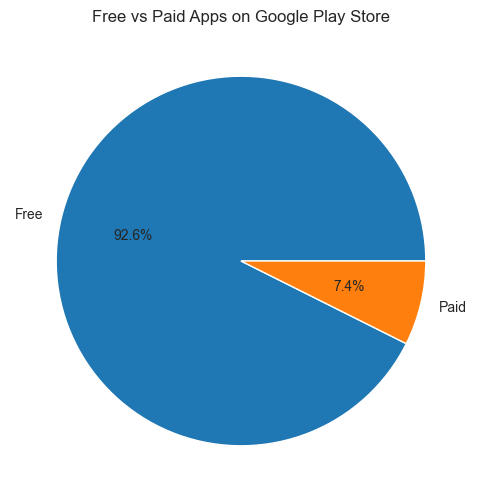

In [25]:
plt.figure(figsize=(6,6))
type_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title("Free vs Paid Apps on Google Play Store")
plt.ylabel("")
plt.show()

### Key Insight

The pie chart clearly shows that an overwhelming majority of applications are
free to download, while paid applications represent only a small fraction of
the total.

This dominance of free apps indicates that developers primarily rely on
alternative revenue streams such as advertisements, subscriptions, and
in-app purchases rather than direct app sales.

## Genre Distribution (Apple App Store)


This analysis focuses on understanding how applications are distributed across
different genres in the Apple App Store. Grouping apps by genre helps identify
dominant segments and reveals platform-specific content preferences.

Genre distribution analysis is crucial for understanding where development
efforts are concentrated and which types of applications attract the most
attention from both developers and users.


In [26]:
apple_genres = apple_df['prime_genre'].value_counts()
apple_genres.head(10)

prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Name: count, dtype: int64

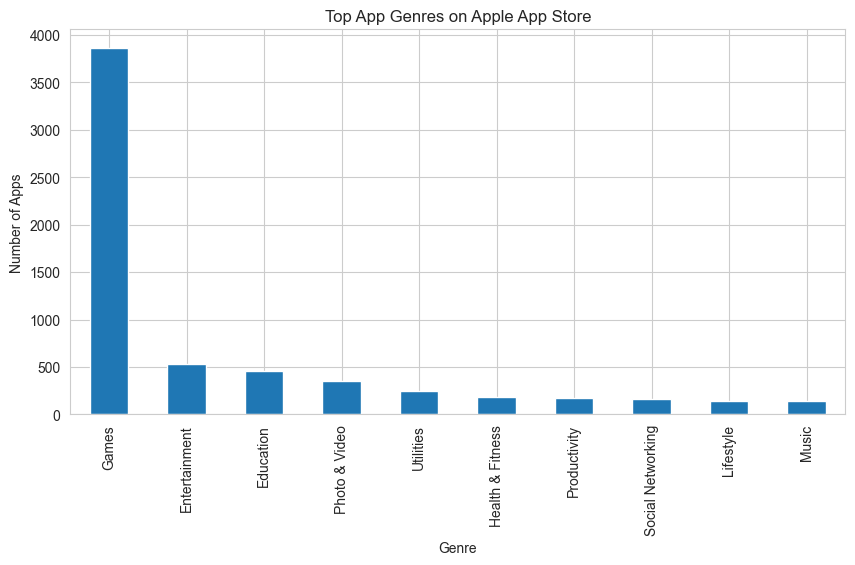

In [27]:
plt.figure(figsize=(10,5))
apple_genres.head(10).plot(kind='bar')
plt.title("Top App Genres on Apple App Store")
plt.xlabel("Genre")
plt.ylabel("Number of Apps")
plt.show()


### Key Insight

The visualization shows that the **Games** genre overwhelmingly dominates the
Apple App Store, significantly surpassing all other genres.

This highlights Apple’s strong gaming ecosystem and user preference for
interactive entertainment. However, it also implies high competition within
the gaming space, making differentiation essential for success.

## User Rating Distribution Comparison

Comparing user rating distributions across platforms provides insight into
differences in user behavior and rating tendencies. By analyzing the spread
and concentration of ratings, we can infer how strictly users evaluate apps
on each platform.

This comparison helps developers understand platform-specific quality
expectations and user feedback patterns.

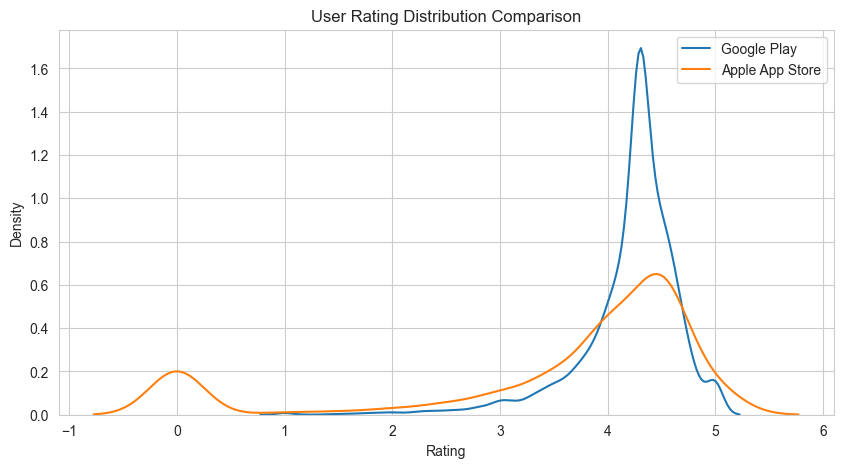

In [28]:
plt.figure(figsize=(10,5))
sns.kdeplot(google_df['Rating'], label='Google Play')
sns.kdeplot(apple_df['user_rating'], label='Apple App Store')
plt.title("User Rating Distribution Comparison")
plt.legend()
plt.show()

### Key Insight

The comparison plot shows that Google Play Store ratings are more sharply
concentrated around higher values, while Apple App Store ratings exhibit a
broader distribution.

This suggests that Apple users tend to be more critical, offering a wider
range of ratings, whereas Google Play users appear more generous in their
rating behavior.


## Combined Insights

Analyzing both Google Play Store and Apple App Store reveals distinct platform behaviors
and user expectations.

On Google Play Store, free apps dominate the ecosystem, emphasizing **scale-based
monetization** strategies such as advertising and freemium models. High install counts
and broad accessibility are critical success factors on this platform.

In contrast, the Apple App Store demonstrates a stronger willingness among users to pay
for high-quality applications. Paid apps with strong user ratings and polished experiences
perform better, highlighting a **quality-first monetization approach**.

Across both platforms, categories such as **Games, Productivity, Education, and Utilities**
consistently show strong engagement. High ratings correlate strongly with higher installs
and review counts, reinforcing the importance of user experience and reliability.These insights suggest that platform-specific strategies are essential rather than a
one-size-fits-all approach.

Based on the analysis, future app development strategies should be aligned with
platform-specific user behavior and monetization trends.

For Google Play Store, developers should prioritize:
- Free or freemium app models
- High scalability and mass-market accessibility
- Revenue generation through ads or in-app purchases

For Apple App Store, recommended strategies include:
- Premium or paid apps with strong value propositions
- High-quality user experience and design
- Targeting niche audiences willing to pay for reliability and performance

Additionally, developers should invest in continuous user feedback analysis,
feature improvements, and rating optimization, as long-term profitability is
closely tied to sustained user satisfaction rather than initial downloads alone.

## Conclusion



This project demonstrates how mobile app store data can be leveraged to make informed
business and product decisions. Through structured data cleaning, exploratory data
analysis, and visualization, we identified patterns that define profitable app profiles
across platforms.

The analysis highlights that profitability is influenced not just by app category,
but by the alignment of user expectations, engagement metrics, and monetization strategy.
By applying platform-specific insights and focusing on long-term user satisfaction,
developers and organizations can significantly improve their chances of success
in a highly competitive mobile app market.
